<a href="https://colab.research.google.com/github/asrianda/pemograman/blob/main/Materi_MTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contoh Data Aset TI:
  ID_Aset Jenis_Aset  Usia_Aset  Jam_Operasi_per_Minggu  \
0    A001     Router          2                      75   
1    A002    Printer          2                      36   
2    A003     Server          4                      78   
3    A004     Router          8                      68   
4    A005     Router          7                      21   

   Frekuensi_Maintenance  Suhu_RataRata  Tingkat_Kegagalan  Umur_Aset_Tersisa  
0                      4             37                  3                  1  
1                      8             44                  0                  7  
2                      6             43                  5                  1  
3                      8             32                  5                  1  
4                      1             26                  4                  1  

📊 Evaluasi Model Regresi Linier:
MAE (Mean Absolute Error)  : 2.86
MSE (Mean Squared Error)   : 13.12
R² (Koefisien Determinasi) : 0.34


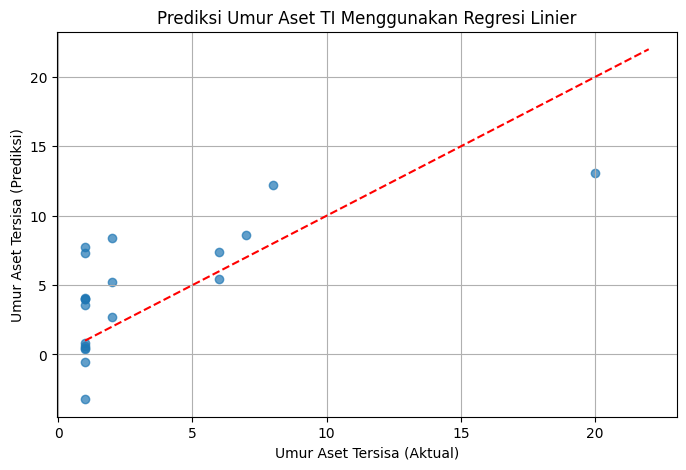


Koefisien Model:
                    Fitur  Koefisien
2   Frekuensi_Maintenance   0.763104
1  Jam_Operasi_per_Minggu  -0.055624
5       Jenis_Aset_Laptop   1.473106
6      Jenis_Aset_Printer  -1.222117
7       Jenis_Aset_Router  -0.353757
3           Suhu_RataRata  -0.290578
4       Tingkat_Kegagalan  -0.992435
0               Usia_Aset  -1.181596

Dataset berhasil disimpan sebagai: dataset_prediksi_aset_TI.csv


In [ ]:
# ============================================
# PREDIKSI UMUR ASET TI (REGRESI LINIER)
# Dapat dijalankan langsung di Google Colab
# ============================================

import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 1) Buat dataset simulatif ---
np.random.seed(42)
n = 100

data = {
    'ID_Aset': [f'A{i:03d}' for i in range(1, n+1)],
    'Jenis_Aset': np.random.choice(['Server', 'Laptop', 'Router', 'Printer'], n),
    'Usia_Aset': np.random.randint(1, 10, n),
    'Jam_Operasi_per_Minggu': np.random.randint(20, 80, n),
    'Frekuensi_Maintenance': np.random.randint(1, 12, n),
    'Suhu_RataRata': np.random.randint(20, 45, n),
    'Tingkat_Kegagalan': np.random.randint(0, 6, n)
}

df = pd.DataFrame(data)

# Target: umur aset tersisa (bulan)
df['Umur_Aset_Tersisa'] = (
    40
    - 2.5 * df['Usia_Aset']
    - 0.1 * df['Jam_Operasi_per_Minggu']
    - 0.8 * df['Suhu_RataRata']
    + 1.5 * df['Frekuensi_Maintenance']
    - 1.8 * df['Tingkat_Kegagalan']
    + np.random.normal(0, 3, n)
).astype(int)
df['Umur_Aset_Tersisa'] = df['Umur_Aset_Tersisa'].clip(lower=1)

print("Contoh Data Aset TI:")
print(df.head())

# --- 2) One-hot encoding aman (tidak error KeyError) ---
kategori = CategoricalDtype(categories=['Server', 'Laptop', 'Router', 'Printer'], ordered=False)
df['Jenis_Aset'] = df['Jenis_Aset'].astype(kategori)
df_dummies = pd.get_dummies(df['Jenis_Aset'], prefix='Jenis_Aset', drop_first=False)
expected_cols = ['Jenis_Aset_Server', 'Jenis_Aset_Laptop', 'Jenis_Aset_Router', 'Jenis_Aset_Printer']
df_dummies = df_dummies.reindex(columns=expected_cols, fill_value=0)

# Gabungkan kembali dan hapus baseline (Server)
df_encoded = pd.concat([df.drop(columns=['Jenis_Aset']), df_dummies], axis=1)
df_encoded = df_encoded.drop(columns=['Jenis_Aset_Server'])

# --- 3) Siapkan fitur dan target ---
X = df_encoded[['Usia_Aset', 'Jam_Operasi_per_Minggu', 'Frekuensi_Maintenance',
                'Suhu_RataRata', 'Tingkat_Kegagalan',
                'Jenis_Aset_Laptop', 'Jenis_Aset_Printer', 'Jenis_Aset_Router']]
y = df_encoded['Umur_Aset_Tersisa']

# --- 4) Split data, latih model ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# --- 5) Evaluasi model ---
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluasi Model Regresi Linier:")
print(f"MAE (Mean Absolute Error)  : {mae:.2f}")
print(f"MSE (Mean Squared Error)   : {mse:.2f}")
print(f"R² (Koefisien Determinasi) : {r2:.2f}")

# --- 6) Visualisasi hasil prediksi ---
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Umur Aset Tersisa (Aktual)")
plt.ylabel("Umur Aset Tersisa (Prediksi)")
plt.title("Prediksi Umur Aset TI Menggunakan Regresi Linier")
plt.grid(True)
plt.show()

# --- 7) Tampilkan koefisien model ---
coef_df = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': model.coef_
}).sort_values('Fitur')
print("\nKoefisien Model:")
print(coef_df)

# --- 8) Simpan dataset ke file CSV ---
df.to_csv("dataset_prediksi_aset_TI.csv", index=False)
print("\nDataset berhasil disimpan sebagai: dataset_prediksi_aset_TI.csv")


In [2]:
# ===============================================
# Program Prediksi Umur Aset TI (Tanpa ace_tools)
# Rumus: T_pred = α*U + β*H + γ*M + ε
# ===============================================

import pandas as pd

# Fungsi prediksi
def prediksi_umur_aset(U, H, M, alpha=-2.3, beta=-0.08, gamma=1.5, epsilon=2.0):
    T_pred = alpha * U + beta * H + gamma * M + epsilon
    return round(T_pred, 2)

# Contoh data aset
contoh_data = [
    {"U": 3, "H": 60, "M": 4, "label": "Aset lama"},
    {"U": 1, "H": 40, "M": 8, "label": "Aset baru"}
]

# Hitung prediksi untuk setiap aset
hasil = []
for d in contoh_data:
    pred = prediksi_umur_aset(d["U"], d["H"], d["M"])
    hasil.append({
        "Kategori": d["label"],
        "Usia (th)": d["U"],
        "Jam Operasi/minggu": d["H"],
        "Frekuensi Maintenance/tahun": d["M"],
        "T_pred (bulan)": pred
    })

# Tampilkan hasil dalam tabel
df_hasil = pd.DataFrame(hasil)
print("\n=== Hasil Perhitungan Prediksi Umur Aset TI ===\n")
print(df_hasil.to_string(index=False))

# Tambahan: perhitungan interaktif
print("\n=== Coba Hitung Sendiri ===")
try:
    U = float(input("Masukkan Usia Aset (tahun): "))
    H = float(input("Masukkan Jam Operasi per Minggu: "))
    M = float(input("Masukkan Frekuensi Maintenance per Tahun: "))
    pred = prediksi_umur_aset(U, H, M)
    print(f"\nHasil Prediksi Umur Aset Tersisa: {pred} bulan")

    if pred < 0:
        print("⚠️ Aset sudah melewati masa pakai ideal dan perlu diganti.")
    elif pred < 6:
        print("🔸 Aset mendekati batas umur pakai, siapkan rencana penggantian.")
    else:
        print("✅ Aset masih dalam masa pakai yang layak.")
except:
    print("Masukan tidak valid. Silakan coba lagi.")



=== Hasil Perhitungan Prediksi Umur Aset TI ===

 Kategori  Usia (th)  Jam Operasi/minggu  Frekuensi Maintenance/tahun  T_pred (bulan)
Aset lama          3                  60                            4            -3.7
Aset baru          1                  40                            8             8.5

=== Coba Hitung Sendiri ===
Masukkan Usia Aset (tahun): 20
Masukkan Jam Operasi per Minggu: 12
Masukkan Frekuensi Maintenance per Tahun: 21

Hasil Prediksi Umur Aset Tersisa: -13.46 bulan
⚠️ Aset sudah melewati masa pakai ideal dan perlu diganti.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dt=pd.read_csv('dataset_prediksi_aset_TI.csv')
dt.head()

,ID_Aset,Jenis_Aset,Usia_Aset,Jam_Operasi_per_Minggu,Frekuensi_Maintenance,Suhu_RataRata,Tingkat_Kegagalan,Umur_Aset_Tersisa
0,A001,Router,2,75,4,37,3,1
1,A002,Printer,2,36,8,44,0,7
2,A003,Server,4,78,6,43,5,1
3,A004,Router,8,68,8,32,5,1
4,A005,Router,7,21,1,26,4,1
